# Google sheet with personal questions

https://docs.google.com/spreadsheets/d/1kH6AfE3Iu6kdgQsDQvEGXaAkKlhAT6VaxeFOlJpnC0E/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

For example, R. Daneel Olivaw need to report questions 1.1, 1.2, 2.2, 2.3, etc.




# Submiting the answers


Google form to submit your answers: https://docs.google.com/forms/d/e/1FAIpQLSd2gNxCq9j8ZE_NzZlV8Q-gTNbiic5Rkx3vitz7vMlfzkzAzQ/viewform?usp=sf_link

Google form has fields for all questions, but you only need to answer **your** questions (from google sheet above).

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

Every question has an information about the type of the answer, e.g.

> Observe top 10 observations (int)

here your answer must be a single **integer** number.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order, without spacing, divided by a comma, e.g.:

10.453,9.112,5.001,5.000 - Right

10.453, 9.112, 5.001, 5.000 - WRONG

---

Part of the tasks, e.g. Q19.1-5, Q20.1-5 do not have corresponding fields in the google form. They are **not optional** and they will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=12

# Assignment 1. House Pricing.
by Anvar Kurmukov

---

By the end of this task you will be able to manipulate huge tabular data:
1. Compute different column's statistics (min, max, mean, quantiles etc.);
2. Select observations/features by condition/index;
3. Create new non-linear combinations of the columns (feature engineering);
4. Perform automated data cleaning;

and more.

---

For those who are not familiar with `pandas` we recommend these (alternative) tutorials:

1. Single notebook, covers basic pandas functionality (starting with renaming columns ending with using map, apply etc) ~ 30 short examples with links on videos https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb . Highly recommended for everyone. (about 1-3 hours to go through)

2. https://github.com/guipsamora/pandas_exercises/ 11 topics covering all essential functionality with excersises (with solutions).

This task will be an easy ride after these tutorials.

---

We are using house sale price data from King County, Wahington, USA. This dataset is in public domain and can be obtained from Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

You need to place `kc_nouse_data.csv` file in the same directory as this notebook.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Loading data

As always in Data Science you are starting with making nice cup of tea (or coffee). Your next move is to load the data:

- Start with loading `house_data.csv` file using `pd.read_csv()` function.
- You may also want to increase maximal displayed pandas columns: set `pd.options.display.max_columns` to 30
- Print top 10 observations in the table. `.head()`
- Print last 10 observations in the table. `.tail()`
- Print all the data columns names using method `.columns`
- Print data size (number of rows and columns). This is the `.shape` of the data.

*Almost* every python has a `head` and a `tail` just as DataFrames do.

In [70]:
# Load the data
kc_house_data = pd.read_csv("kc_house_data.csv",delimiter=',')

In [71]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [72]:
kc_house_data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [73]:
kc_house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [74]:
kc_house_data.shape

(21613, 21)

In [75]:
# Observe top 10 observations (int)

# Q1.1 What is the price of a house with `id` == 7237550310?
# Q1.2 How many bedrooms has a house with `id` == 7237550310?
# Q1.3 When was the house with `id` == 2414600126 built (`yr_built`)?

# Q1.4 What is the `grade` of a house with `id` == 5631500400?
line1 = kc_house_data[kc_house_data['id'] == 5631500400]
grade = int(line1['grade'])
print("grade=",grade)

# Q1.5 When was the house with `id` == 6414100192 renovated (`yr_renovated`)?
line2 = kc_house_data[kc_house_data['id'] == 6414100192]
renovated = int(line2['yr_renovated'])
print("renovated=",renovated)

grade= 6
renovated= 1991


In [76]:
# Observe last 10 observations (int)

# Q2.1 What is the price of a house with `id` == 263000018?

# Q2.2 How many bedrooms has a house with `id` == 291310100?
line3 = kc_house_data[kc_house_data['id'] == 291310100]
bedroomz = int(line3['bedrooms'])
print("bedrooms=",bedroomz)

# Q2.3 When was the house with `id` == 1523300141 built (`yr_built`)?

# Q2.4 How many floors house with `id` == 2997800021 has?
line4 = kc_house_data[kc_house_data['id'] == 2997800021]
floorz = int(line4['floors'])
print("floors=",floorz)

# Q2.5 What is the zipcode of the house with `id` == 7852140040?

bedrooms= 3
floors= 2


In [77]:
# Increase maximal displayed columns
pd.options.display.max_columns = 30

In [78]:
# Observe top 10 observations again
# Is there any new columns displayed?
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [79]:
# Print all the columns/features names (int)

# Q3.1 How many columns have `yr_` prefix?
print('yr_=',len(kc_house_data.filter(regex='^yr_',axis=1).columns))

# Q3.2 How many columns have `sqft_` prefix?
# Q3.3 How many columns assosiated with house earth coordinates are in the data?

# Q3.4 How many columns have `rooms` in their names?
print('rooms=',len(kc_house_data.filter(regex='rooms',axis=1).columns))

yr_= 2
rooms= 2


In [80]:
# Print data size (int)

# Q4.1 How many observations are in the data?
observations = kc_house_data.shape[0]
print("observations=",observations)

# Q4.2 How many features are in the data?
features = kc_house_data.shape[1]
print("features=",features)

observations= 21613
features= 21


# 2. Basic data exploration

Lets do some basics:
- `.count()` number of not NaN's in every column.
- Is there any missing values in the data?
- Count number of unique values in every column `.nunique()`. 
- What does this tells you about the features, which are most likely categorical and which are most likely numerical?
- Use pandas `.describe()` to display basic statistic about the data.
- Use pandas `.value_counts()` to count number of unique values in a specific column.
- Use pandas `.min()`, `.max()`, `.mean()`, `.std()` to display specific statistics about the data.
- Use pandas `.dtypes` field to display data types in columns.

**Hint**
You could use `.sort_index()` or `.sort_values()` to sort the result of `.value_counts()`

In [81]:
# Display number of not NaN's in every column (int)

# Q5.1 How many NA values are in the `floors` column?
floorsnull = int(kc_house_data['floors'].isnull().sum())
print('floorsnull=',floorsnull)

# Q5.2 How many NA values are in the `grade` column?
# Q5.3 How many NA values are in the `bedrooms` column?
# Q5.4 How many NA values are in the `yr_built` column?

# Q5.5 How many NA values (not zeros, but empty, missing values) are in the `yr_renovated` column?
yr_renovatednull = int(kc_house_data['yr_renovated'].isnull().sum())
print('yr_renovatednull=',yr_renovatednull)

floorsnull= 0
yr_renovatednull= 0


In [82]:
# Count number of unique values in every column (int)

# Q6.1 How many unique values are in the `bedrooms` column?

# Q6.2 How many unique values are in the `grade` column?
uniquegrade = kc_house_data.grade.nunique()
print('uniquegrade=',uniquegrade)

# Q6.3 How many unique values are in the `yr_renovated` column?
# Q6.4 How many unique values are in the `bathrooms` column?

# Q6.5 How many unique values are in the `long` column?
uniquelong = kc_house_data.long.nunique()
print('uniquelong=',uniquelong)

uniquegrade= 12
uniquelong= 752


In [83]:
# Count frequency of the values in different columns (list of ints in ascending order)
# You could select a column using same syntax as for selecting a key from a dictionary: `data[colname]`

# Q7.1 For every unique `floors` value give its number of occurences.
# Q7.2 For every unique `condition` value give its number of occurences.
# Q7.3 For every unique `bedrooms` value give its number of occurences.

# Q7.4 For every unique `grade` value give its number of occurences.
print('gradesfreq:')
#print(sorted(kc_house_data['grade'].value_counts().tolist()))
print(str(sorted(kc_house_data['grade'].value_counts().tolist())).replace(' ', '').replace(']', '').replace('[', '').replace('', ''))


# Q7.5 For every unique `view` value give its number of occurences.
print('viewfreq:')
#print(sorted(kc_house_data['view'].value_counts().tolist()))
print(str(sorted(kc_house_data['view'].value_counts().tolist())).replace(' ', '').replace(']', '').replace('[', '').replace('', ''))

gradesfreq:
1,3,13,29,90,242,399,1134,2038,2615,6068,8981
viewfreq:
319,332,510,963,19489


In [84]:
# Display basic data statistics using .describe()
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [85]:
# Display some column statistics (list of floats, rounded up to 3 digits, e.g. 1.234)

# Q8.1 What are the max, min, mean and the std of the `floors` column?
print('floors')
listt1 = [kc_house_data['floors'].round(3).max(),kc_house_data['floors'].round(3).min(),round(kc_house_data['floors'].mean(),3)]
#print(listt1)
print(str(listt1).replace(' ', '').replace(']', '').replace('[', '').replace('', ''))

# Q8.2 What are the max, min, mean and the std of the `bedrooms` column?
# Q8.3 What are the max, min, mean and the std of the `sqft_living` column?
# Q8.4 What are the max, min, mean and the std of the `price` column?

# Q8.5 What are the max, min, mean and the std of the `long` column?
print('long')
listt2 = [kc_house_data['long'].round(3).max(),kc_house_data['long'].round(3).min(),round(kc_house_data['long'].mean(),3)]
#print(listt2)
print(str(listt2).replace(' ', '').replace(']', '').replace('[', '').replace('', ''))

floors
3.5,1.0,1.494
long
-121.315,-122.519,-122.214


In [86]:
# Display data types of all columns (int)

# Q9.1 How many columns have `object` data type?

# Q9.2 How many columns have `int64` data type?
print('nimint64=',list(kc_house_data.dtypes).count('int64'))

# Q9.3 How many columns have `float64` data type?

# Display data types of all columns (list of str)
# Q9.4 What are the columns with dtype == `float64`?

# Q9.5 What are the columns with dtype == `int64`?
print()
k = kc_house_data.dtypes
print('columnsint64:')
lst = []
print()
for index,i in enumerate(k):
    if i == 'int64':
      lst.append(k.index[index])
      #print(k.index[index])
str(lst).replace(' ', '').replace(']', '').replace('[', '').replace('', '').replace('', '')

nimint64= 15

columnsint64:



"'id','bedrooms','sqft_living','sqft_lot','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15'"

In [87]:
#asd = []
#k = list(kc_house_data.dtypes)
#for index,i in enumerate(k):
#    if i == 'int64':
#      asd.append(index)
#print(str(asd).replace(' ', '').replace(']', '').replace('[', '').replace('', ''))

# 3. Data selection

In pandas.DataFrame you could select

1. Row/s by position (integer number \[0 .. number of rows - 1\]) `.iloc` or by DataFrame.index `.loc`:
```
data.loc[0]
data.loc[5:10]
data.iloc[0]
data.iloc[5:10]
```
*Though, this is probably the worst way to manipulate rows.*

2. Columns by name
```
data[columname]
```
3. Row/s and columns
```
data.loc[10, columname]
data.iloc[10, columname]
```
4. Using boolean mask
```
mask = data[columname] > value
data[mask]
```
You could combine multiple conditions using `&` or `|` (and, or)

```
cond1 = data[columname1] > value1
cond2 = data[columname2] > value2
data[cond1 & cond2]
```
5. Using queries `.query()`:
```
value = 5
data.query("columname > value")
```
You could combine multiple conditions using `and`, `or`

```
data.query("(columname1 > value1) and (columname2 > value2)")
```
and others. See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html for more examples.

*Remember to use different quotation marks " or ' for columnname inside a query.*


In [88]:
#delete
# setting DataFrame index to be an `id` column, now .loc and .iloc will have different behavior
#kc_house_data.index = kc_house_data.id

# dropping `id` column, since now it is an index
#kc_house_data.drop('id', axis=1, inplace=True)

# sort data by index for clarity
#kc_house_data.sort_index(inplace=True)

In [89]:
# Select rows by position (int) 

# Q10.1 How many bedrooms have a house on row 777?
print('bedrooms=',int(kc_house_data.loc[777,'bedrooms']))

# Q10.2 When was built a house on row 9999?
# Q10.3 How many floors have a house on row 1337?
# Q10.4 How many bathrooms have a house on row 314?

# Q10.5 What is the grade of a house on row 2718?
print('grade=',int(kc_house_data.loc[2718,'grade']))

bedrooms= 4
grade= 7


In [90]:
# Select rows by index (int)

# Q11.1 How many times the house with index 1000102 were sold?

# Q11.2 What is the price of the house with index 9842300095?
line1 = kc_house_data[kc_house_data['id'] == 9842300095]
price = int(line1['price'])
print("price=",price)

# Q11.3 When was built the house with index 104510440?
# Q11.4 What is the condition of a house with index 252000300?

# Q11.5 What is the living area (in square feets) of the house with index 1225069038?
line2 = kc_house_data[kc_house_data['id'] == 1225069038]
sqft_living = int(line2['sqft_living'])
print("sqft_living=",sqft_living)

price= 365000
sqft_living= 13540


In [91]:
# Using mask or .query syntax select rows/columns (int)

# Q12.1 How many houses were built during American Great Depression (1929–1939)? Including both start and end year.

# Q12.2 When was built the only house with basement area = 1024 sqft?
print('wasbuilt=',int(kc_house_data.query("sqft_basement == 1024")['yr_built']))

# Q12.3 How many houses are with the highest possible grade?
# Q12.4 When was built a house with maximal number of bedrooms?

# Q12.5 How many houses were sold for 256000 dollars?
print('soldfor256k=',int(kc_house_data.query("price == 256000").shape[0]))

wasbuilt= 2006
soldfor256k= 8


In [92]:
# Using mask or .query syntax select rows/columns (int)

# Q13.1 How many houses with the waterfront (=1) were built duroing Nixon's presidency (1969—1974)? Including both start and end year.

# Q13.2 How many houses, built before first human in space (<1961), have high condition (=5)?
print('houses=',kc_house_data.query("(yr_built < 1961) and (condition == 5)").shape[0])

# Q13.3 How many houses are with 6 bedrooms and less than 2000 sqft living area?
# Q13.4 What was the price of a house with 5 bathrooms, built in 1998 and graded with 10 score?

# Q13.5 How many floors has a house built in 1999 with 5 bedrooms and 3400 sqft living area?
print('floors=',int(kc_house_data.query("(yr_built == 1999) and (bedrooms == 5) and (sqft_living == 3400)")['floors']))

houses= 1153
floors= 2


In [93]:
# Using mask or .query syntax select rows/columns and compute simple statistics (float)

# Q14.1 What was the average (sold) price of a houses built in the year of Cuban Missile Crisis (1962)?
# Q14.2 What was the price of the most expensive house sold, built between 1991 and 2000?

# Q14.3 What was the price of the least expensive house sold, built between 1991 and 2000?
print('pricemin=',kc_house_data.query("(yr_built > 1991) and (yr_built < 2000)")['price'].min())

# Q14.4 What is the median number of bathrooms in houses with grade above 9 (10 and more)?

# Q14.5 What is the median grade of houses with most popular zipcode value?
kc_house_data['zipcode'].value_counts()
print(kc_house_data['zipcode'].value_counts())
round(kc_house_data.query("zipcode == 98103")['grade'].median(),3)

pricemin= 154000.0
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


7.0

# 4. Creating new columns


Creating new column of pandas.DataFrame is as easy as:
```
data['new_awesome_column'] = [] 
```
that's it. But such a column is relatively useless. 
Typically, you would compute something new based on existing data and save it in a new column. 
For example one might want to compute total area of the house as a sum of all `sqft_` columns, or
create a boolean column of whether the house has `grade` > 2 or anything else:

```
data['total_area'] = data[col1] + data[col2] + ...
data['high_value'] = data[col] > 5
```

Pandas also provides another powerfull tool: `.apply`, `.map()`, `.applymap()` methods (they are kinda the same, but not quite). https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas .
They allow you to *apply* some function to every value in the column/s (row-wise) or row (column-wise) or cell (element-wise). For example, same computations of `total_area` and `high_value` using `.apply()`:
```
data['total_area'] = data[[col1, col2, col3]].apply(sum, axis=1)

```
you are not restricted to existent functions, `.apply()` accepts any function (including lambda functions):

```
data['total_area'] = data[[col1, col2, col3]].apply(lambda x: x[0]+x[1]+x[2], axis=1)
```
or ordinary python function (if this it should have complex behaviour):
```
def _sum(x):
    total = 0
    for elem in x:
        total += elem
    return total
    
data['total_area'] = data[[col1, col2, col3]].apply(_sum, axis=1) 
```
Many pandas methods has `axis` parameter `axis=0` refers to rows, `axis=1` refers to columns.

*Warning. You should never use for loops to sum numerical elements from the container.*

---


In [94]:
# Create `was_renovated` column. Bool column (0, 1) indicating whether the house was renovated.
# kc_house_data['was_renovated'] = kc_house_data['yr_renovated'].apply(lambda x: int(bool(x)))
kc_house_data['was_renovated'] = kc_house_data['yr_renovated'].apply(lambda x: bool(x))
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,True
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,False


In [95]:
# Create new columns using the old ones (new column in your DataFrame)

# Q15.1 Create a `sqft_tot_area` column (sum of all columns with `sqft_` prefix) using any method above
kc_house_data['sqft_tot_area'] = kc_house_data[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].apply(sum,axis=1)

# Q15.2 Create a new column `sqm_tot_area` using `sqft_tot_area` and the fact that 1 foot = 0.3048 meters
kc_house_data['sqm_tot_area'] = kc_house_data['sqft_tot_area'].apply(lambda x: x/0.3048**2)

# Q15.3 Create a new column `sqm_aver_floor_area` by dividing total area (in meters) by number of floors
kc_house_data['sqm_aver_floor_area'] = kc_house_data['sqm_tot_area']/kc_house_data['floors']

# Q15.4 Create a new column `price_cat` by splitting a `price` into 5 ([1..5]) distinct intervals: 0 < x <=20%,    #ДОДОЕЛАТЬ...
# 20% < x <= 40%, ... 80% < x <= 100% percentiles. You could use `.quantile()` to compute percentiles.
kc_house_data['price_cat'] = pd.qcut(kc_house_data['price'],[0, 0.2, 0.4, 0.6, 0.8, 1],labels=False)

# Q15.5 Create a new bool column `high_class` it is True if the house has grade >= 9 and condition >= 4
kc_house_data['high_class'] = (kc_house_data['grade'] >= 9 ) & (kc_house_data['condition'] >= 4)

kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,False,15000,161458.656251,161458.656251,0,False
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,True,21711,233695.259057,116847.629529,3,False
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,False,22322,240272.008322,240272.008322,0,False
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,False,15280,164472.551167,164472.551167,3,False
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,False,20743,223275.793774,223275.793774,2,False


In [96]:
# Using mask or .query syntax select rows/columns (float)

# Q16.1 What is the average price of the house of the high_class(=True)?
line1 = kc_house_data[kc_house_data['high_class'] == True]
aveprice = round(line1['price'].mean(),3)
print("average price=",aveprice)

# Q16.2 What is the average total_area (in meters) of the house from highest price category?
# Q16.3 What is the maximal number of floors amongst houses with the lowest price category?
# Q16.4 What is the most frequent zipcode amongst houses with the lowest price category?

# Q16.5 What is the minimal number of bathrooms in houses with high_class=True?
line2 = kc_house_data[kc_house_data['high_class'] == True]
minbath = line2['bathrooms'].min()
print("minbath=",minbath)

average price= 1146802.328
minbath= 1.0


# 5. Basic date processing

You figure out that column `date` is to harsh for you, so you decided to convert it to a more plausible format:

- Use pandas method `to_datetime()` to convert the date to a good format.
- Exctract `year`, `month`, `day` and `weekday` from your new date column. Save them to separete columns.
- How many columns has your data now?
- Drop column `date`, remember to set `inplace` parameter to True.


**Hint** for datetime formatted date you could extract the `year` as follow:
```
data.date.dt.year
```

Very often date could be a ridiculously rich feature, sometimes it is holidays that matters, sometimes weekends, sometimes some special days like **black friday**. 

Learn how to work with date in Python!

In [97]:
# Create new columns based on `date` column

# Q17.1 Convert date to datetime format
kc_house_data['date']= pd.to_datetime(kc_house_data['date'])

# Q17.2 Extract and store `year`
kc_house_data['year'] = kc_house_data['date'].dt.year

# Q17.3 Extract and store `month`
kc_house_data['month'] = kc_house_data['date'].dt.month

# Q17.4 Extract and store `day`
kc_house_data['day'] = kc_house_data['date'].dt.day

# Q17.5 Extract and store `weekday`
kc_house_data['weekday'] = kc_house_data['date'].dt.weekday

# Q17.6 Create a new column `house_age_10` - the age of the house in full decades (e.g. 9 year old house - 0, 21 year old house - 2),
# using `yr_built` and 'year' columns
kc_house_data['house_age_10'] = abs(kc_house_data['year'] - kc_house_data['yr_built'])//10
kc_house_data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,...,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,year,month,day,weekday,house_age_10
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,...,47.5112,-122.257,1340,5650,False,15000,161458.656251,161458.656251,0,False,2014,10,13,0,5
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,...,47.7210,-122.319,1690,7639,True,21711,233695.259057,116847.629529,3,False,2014,12,9,1,6
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,...,47.7379,-122.233,2720,8062,False,22322,240272.008322,240272.008322,0,False,2015,2,25,2,8
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,...,47.5208,-122.393,1360,5000,False,15280,164472.551167,164472.551167,3,False,2014,12,9,1,4
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,...,47.6168,-122.045,1800,7503,False,20743,223275.793774,223275.793774,2,False,2015,2,18,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,...,47.6993,-122.346,1530,1509,False,7230,77823.072313,25941.024104,1,False,2014,5,21,2,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,...,47.5107,-122.362,1830,7200,False,19463,209497.988440,104748.994220,2,False,2015,2,23,0,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,...,47.5944,-122.299,1020,2007,False,6417,69072.013144,34536.006572,2,False,2014,6,23,0,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,...,47.5345,-122.069,1410,1287,False,8285,89178.997802,44589.498901,2,False,2015,1,16,4,1


In [98]:
# Drop column `date`
del kc_house_data['date']

In [99]:
kc_house_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,year,month,day,weekday,house_age_10
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,...,47.5112,-122.257,1340,5650,False,15000,161458.656251,161458.656251,0,False,2014,10,13,0,5
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,...,47.7210,-122.319,1690,7639,True,21711,233695.259057,116847.629529,3,False,2014,12,9,1,6
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,...,47.7379,-122.233,2720,8062,False,22322,240272.008322,240272.008322,0,False,2015,2,25,2,8
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,...,47.5208,-122.393,1360,5000,False,15280,164472.551167,164472.551167,3,False,2014,12,9,1,4
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,...,47.6168,-122.045,1800,7503,False,20743,223275.793774,223275.793774,2,False,2015,2,18,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,...,47.6993,-122.346,1530,1509,False,7230,77823.072313,25941.024104,1,False,2014,5,21,2,0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,...,47.5107,-122.362,1830,7200,False,19463,209497.988440,104748.994220,2,False,2015,2,23,0,0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,...,47.5944,-122.299,1020,2007,False,6417,69072.013144,34536.006572,2,False,2014,6,23,0,0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,...,47.5345,-122.069,1410,1287,False,8285,89178.997802,44589.498901,2,False,2015,1,16,4,1


In [100]:
# Find some date related information from the data (int, Sunday has index 0)

# Q18.1 What is the most popular selling weekday?
# Q18.2 What is the most popular selling month?

# Q18.3 What is the least popular selling weekday?
print('popularweekday:',int(kc_house_data['weekday'].value_counts().index[6]))

# Q18.4 What is the median age of the house (on a first available sold date)? (float)
print('medianage:',float(kc_house_data.drop_duplicates(['id'])['house_age_10'].median()))

# Q18.5 How many houses were sold on America's Independence Day (July, 4)?

popularweekday: 6
medianage: 3.0


# 6. Groupby
from the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

By “group by” we are referring to a process involving one or more of the following steps:

    - Splitting the data into groups based on some criteria.
    - Applying a function to each group independently.
    - Combining the results into a data structure.
    
---
`.groupby()` is one of the most powerfull tool for feature engineering. Very often it is used to group object with the same categorical characteristics and compute some statistics (e.g. mean, max, etc.) of a their numerical characteric. 

Instead of computing average area of houses with high grade you could compute average areas of the
houses for every grade in a single command:

```
data.groupby('grade')['sqm_tot_area'].mean()
```

You could also make multi-column groups:

```
data.groupby(['weekday','grade'])['price'].min()
```
next, you could compute multiple aggregation functions:
```
data.groupby(['weekday','grade'])['price'].agg([min, max])
```

instead of using built-in functions you could compute custom functions using apply:
```
import numpy as np
data.groupby(['condition','grade'])['bathrooms'].apply(lambda x: np.quantile(x, .5))
```

and the coolest thing now is that you can map the results of groupby back on your DataFrame!
```
gp = data.groupby(['condition'])['bathrooms'].median()
data['gp_feature'] = data['condition'].map(gp)
```
Now, if some house has `condition == 2`, its `gp_feature` will be equal to the median number of 
bathrooms amongst all houses with `condition == 2`.

Read more examples in the documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [101]:
# Create some groupby features

# Q19.1 `price_by_class` groupby `high_class` and compute median `price`.
kc_house_data['price_by_class'] = kc_house_data['high_class'].map(kc_house_data.groupby('high_class')['price'].median())
print(kc_house_data.groupby('high_class')['price'].median())

# Q19.2 `price_by_year` groupby `year` and compute median price.
kc_house_data['price_by_year'] = kc_house_data['year'].map(kc_house_data.groupby('year')['price'].median())
print(kc_house_data.groupby('year')['price'].median())

# Q19.3 `price_by_weekday` groupby `weekday` and compute median price.
# Q19.4 `area_by_price` groupby `price_cat` and compute average `sqft_living`.
# Q19.5 `floors_by_age` groupby `floors` and compute average age of a house.

high_class
False    440000.0
True     965000.0
Name: price, dtype: float64
year
2014    450000.0
2015    450500.0
Name: price, dtype: float64


In [102]:
kc_house_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,year,month,day,weekday,house_age_10,price_by_class,price_by_year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,...,1340,5650,False,15000,161458.656251,161458.656251,0,False,2014,10,13,0,5,440000.0,450000.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,...,1690,7639,True,21711,233695.259057,116847.629529,3,False,2014,12,9,1,6,440000.0,450000.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,...,2720,8062,False,22322,240272.008322,240272.008322,0,False,2015,2,25,2,8,440000.0,450500.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,...,1360,5000,False,15280,164472.551167,164472.551167,3,False,2014,12,9,1,4,440000.0,450000.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,...,1800,7503,False,20743,223275.793774,223275.793774,2,False,2015,2,18,2,2,440000.0,450500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,...,1530,1509,False,7230,77823.072313,25941.024104,1,False,2014,5,21,2,0,440000.0,450000.0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,...,1830,7200,False,19463,209497.988440,104748.994220,2,False,2015,2,23,0,0,440000.0,450500.0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,...,1020,2007,False,6417,69072.013144,34536.006572,2,False,2014,6,23,0,0,440000.0,450000.0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,...,1410,1287,False,8285,89178.997802,44589.498901,2,False,2015,1,16,4,1,440000.0,450500.0


In [103]:
# Create some other groupby features
# for this task check out this answer:
# https://stackoverflow.com/questions/47913343/how-to-groupby-and-map-by-two-columns-pandas-dataframe

# Q20.1 `n_houses_zipcode` groupby `zipcode` and count number of occurences of every unique zipcode
kc_house_data['n_houses_zipcode'] = kc_house_data['zipcode'].map(kc_house_data.groupby('zipcode')['zipcode'].count())
kc_house_data

# Q20.2 `n_houses_yr_built` groupby `yr_built` and count number of houses built in each year
# Q20.3 `price_by_yr_month_`(median, std) groupby `year`, `month` and compute median and std `price`.
# Q20.4 `price_by_grade_age_`(median, std) groupby `grade`, `house_age` and compute median and std `price`.
val = kc_house_data.groupby(['grade','house_age_10'], as_index = False)['price'] #was added after deadline
val1 = val.median()
kc_house_data['price_by_grade_age_std'] = kc_house_data['grade'].map(val1.drop_duplicates('grade').set_index('grade')['price'])
kc_house_data

# Q20.5 `living_by_cond_`(median, std) groupby `waterfront`, `view`, `condition` and compute median and std `sqft_living`.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,price_cat,high_class,year,month,day,weekday,house_age_10,price_by_class,price_by_year,n_houses_zipcode,price_by_grade_age_std
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,...,False,15000,161458.656251,161458.656251,0,False,2014,10,13,0,5,440000.0,450000.0,262,330000.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,...,True,21711,233695.259057,116847.629529,3,False,2014,12,9,1,6,440000.0,450000.0,410,330000.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,...,False,22322,240272.008322,240272.008322,0,False,2015,2,25,2,8,440000.0,450500.0,283,241000.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,...,False,15280,164472.551167,164472.551167,3,False,2014,12,9,1,4,440000.0,450000.0,263,330000.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,...,False,20743,223275.793774,223275.793774,2,False,2015,2,18,2,2,440000.0,450500.0,441,452000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,...,False,7230,77823.072313,25941.024104,1,False,2014,5,21,2,0,440000.0,450000.0,602,452000.0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,...,False,19463,209497.988440,104748.994220,2,False,2015,2,23,0,0,440000.0,450500.0,288,452000.0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,...,False,6417,69072.013144,34536.006572,2,False,2014,6,23,0,0,440000.0,450000.0,343,330000.0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,...,False,8285,89178.997802,44589.498901,2,False,2015,1,16,4,1,440000.0,450500.0,412,452000.0


# 7. Building a regression model

> You do not need to normalize data for tree models, and for linear/knn models this step is essential.

> Remember, that not all of the features in the table are numeric, some of them might be viewed as categorical.

> You may create or drop **any** features you want, except for the features which use `price` (e.g. average price of a house with 5 bedrooms).

In [104]:
# Q21 Drop all generated features which used price column, e.g. price_by_year, price_cat.
del kc_house_data['price_by_class']

In [105]:
del kc_house_data['price_by_year']

In [106]:
del kc_house_data['price_cat']

In [107]:
kc_house_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,long,sqft_living15,sqft_lot15,was_renovated,sqft_tot_area,sqm_tot_area,sqm_aver_floor_area,high_class,year,month,day,weekday,house_age_10,n_houses_zipcode,price_by_grade_age_std
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,...,-122.257,1340,5650,False,15000,161458.656251,161458.656251,False,2014,10,13,0,5,262,330000.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,...,-122.319,1690,7639,True,21711,233695.259057,116847.629529,False,2014,12,9,1,6,410,330000.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,...,-122.233,2720,8062,False,22322,240272.008322,240272.008322,False,2015,2,25,2,8,283,241000.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,...,-122.393,1360,5000,False,15280,164472.551167,164472.551167,False,2014,12,9,1,4,263,330000.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,...,-122.045,1800,7503,False,20743,223275.793774,223275.793774,False,2015,2,18,2,2,441,452000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,...,-122.346,1530,1509,False,7230,77823.072313,25941.024104,False,2014,5,21,2,0,602,452000.0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,...,-122.362,1830,7200,False,19463,209497.988440,104748.994220,False,2015,2,23,0,0,288,452000.0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,...,-122.299,1020,2007,False,6417,69072.013144,34536.006572,False,2014,6,23,0,0,343,330000.0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,...,-122.069,1410,1287,False,8285,89178.997802,44589.498901,False,2015,1,16,4,1,412,452000.0


In [108]:
from sklearn.metrics import r2_score

In [109]:
# Q22 Split your data into train and test parts.
# How many records (rows) do you have in train and test tables? (list of int)?
# Use sklearn.model_selection.train_test_split with test_size=0.33 and random_state=7
num_features, cat_features  = ['bedrooms', 'bathrooms', 'floors', 'sqft_tot_area','sqft_above','sqft_basement','sqft_living15','sqft_lot15'], ['waterfront', 'view', 'condition', 'grade', 'was_renovated', 'high_class', 'house_age_10'] # define features
X, y = kc_house_data[[*num_features, *cat_features]], kc_house_data['price'] # define X,y 
#

In [110]:
# Create a predictive regression model of a house price.

# Q23.1 Use linear regression with l2 regularization (Ridge regression)


# Q23.2 Use decision tree regression
# Q23.3 Use k nearest neighbours regression



# Use grid search to select optimal hyperparamters of your models. 

# Q24.1 Alpha for a ridge regression


# Q24.2 Depth for the tree

# Q24.3 Number of neighbours for the knn

### 1 Preprocess categorical features

In [111]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(X[[*cat_features]]))

In [112]:
ohe.categories_

[array([0, 1], dtype=int64),
 array([0, 1, 2, 3, 4], dtype=int64),
 array([1, 2, 3, 4, 5], dtype=int64),
 array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64),
 array([False,  True]),
 array([False,  True]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)]

In [113]:
waterfront_cols = [f'waterfront_{cat}' for cat in ohe.categories_[0]]
view_cols = [f'view_{cat}' for cat in ohe.categories_[1]]
condition_cols = [f'condition_{cat}' for cat in ohe.categories_[2]]
grade_cols = [f'grade_{cat}' for cat in ohe.categories_[3]]
was_renovated_cols = [f'was_renovated_{cat}' for cat in ohe.categories_[4]]
high_class_cols = [f'high_class_{cat}' for cat in ohe.categories_[5]]
house_age_10_cols = [f'house_age_10_{cat}' for cat in ohe.categories_[6]]

In [114]:
dummy_cols_names = [*waterfront_cols, *view_cols,*condition_cols, *grade_cols,*was_renovated_cols, *high_class_cols,*house_age_10_cols] #
encoded_features.columns = dummy_cols_names
encoded_features

,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,grade_1,grade_3,grade_4,...,was_renovated_True,high_class_False,high_class_True,house_age_10_0,house_age_10_1,house_age_10_2,house_age_10_3,house_age_10_4,house_age_10_5,house_age_10_6,house_age_10_7,house_age_10_8,house_age_10_9,house_age_10_10,house_age_10_11
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21609,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21610,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21611,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
X.drop(['waterfront', 'view'], axis=1, inplace=True)

C:\Users\kriku\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [116]:
X = pd.concat([X, encoded_features], axis=1)

In [117]:
X

,bedrooms,bathrooms,floors,sqft_tot_area,sqft_above,sqft_basement,sqft_living15,sqft_lot15,condition,grade,was_renovated,high_class,house_age_10,waterfront_0,waterfront_1,...,was_renovated_True,high_class_False,high_class_True,house_age_10_0,house_age_10_1,house_age_10_2,house_age_10_3,house_age_10_4,house_age_10_5,house_age_10_6,house_age_10_7,house_age_10_8,house_age_10_9,house_age_10_10,house_age_10_11
0,3,1.00,1.0,15000,1180,0,1340,5650,3,7,False,False,5,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,2.25,2.0,21711,2170,400,1690,7639,3,7,True,False,6,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,1.0,22322,770,0,2720,8062,3,6,False,False,8,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,3.00,1.0,15280,1050,910,1360,5000,5,7,False,False,4,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,1.0,20743,1680,0,1800,7503,3,8,False,False,2,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,7230,1530,0,1530,1509,3,8,False,False,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21609,4,2.50,2.0,19463,2310,0,1830,7200,3,8,False,False,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21610,2,0.75,2.0,6417,1020,0,1020,2007,3,7,False,False,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21611,3,2.50,2.0,8285,1600,0,1410,1287,3,8,False,False,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2 Split data into train and test

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7) # split in to parts X_train, X_test, y_train, y_test

In [119]:
trainandtestrows = [X_train.shape[0],X_test.shape[0]] #count train and testrows
print('trainandtestrows=',str(trainandtestrows).replace(' ', '').replace(']', '').replace('[', '').replace('', ''))

trainandtestrows= 14480,7133


In [120]:
X_train

,bedrooms,bathrooms,floors,sqft_tot_area,sqft_above,sqft_basement,sqft_living15,sqft_lot15,condition,grade,was_renovated,high_class,house_age_10,waterfront_0,waterfront_1,...,was_renovated_True,high_class_False,high_class_True,house_age_10_0,house_age_10_1,house_age_10_2,house_age_10_3,house_age_10_4,house_age_10_5,house_age_10_6,house_age_10_7,house_age_10_8,house_age_10_9,house_age_10_10,house_age_10_11
13772,2,1.00,1.0,16790,890,120,1030,6000,3,6,False,False,9,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16462,3,1.00,1.5,24830,1460,0,1910,10000,3,7,False,False,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100,5,4.50,2.0,45025,6070,0,4750,13404,3,11,False,False,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10368,3,2.00,1.0,16613,910,500,1330,6050,4,7,False,False,6,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6800,3,2.50,1.5,49412,2930,0,3160,20492,3,9,False,False,3,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,5,1.50,1.5,21370,2120,0,1730,7700,5,7,False,False,5,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20691,2,2.25,2.0,5797,940,120,1300,1169,3,8,False,False,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5699,3,2.00,1.5,18570,1810,540,2170,6000,4,8,False,False,7,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10742,4,2.50,2.0,34968,2760,0,2810,13545,4,9,False,True,2,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3 Normalize the data

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

<ipython-input-121-a7ef58bc6fbd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_features] = scaler.transform(X_train[num_features])
C:\Users\kriku\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-121-a7ef58bc6fbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [122]:
X_train

,bedrooms,bathrooms,floors,sqft_tot_area,sqft_above,sqft_basement,sqft_living15,sqft_lot15,condition,grade,was_renovated,high_class,house_age_10,waterfront_0,waterfront_1,...,was_renovated_True,high_class_False,high_class_True,house_age_10_0,house_age_10_1,house_age_10_2,house_age_10_3,house_age_10_4,house_age_10_5,house_age_10_6,house_age_10_7,house_age_10_8,house_age_10_9,house_age_10_10,house_age_10_11
13772,0.181818,0.12500,0.0,0.007246,0.065789,0.024896,0.099130,0.006238,3,6,False,False,9,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16462,0.272727,0.12500,0.2,0.011868,0.128289,0.000000,0.252174,0.010903,3,7,False,False,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100,0.454545,0.56250,0.4,0.023478,0.633772,0.000000,0.746087,0.014873,3,11,False,False,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10368,0.272727,0.25000,0.0,0.007144,0.067982,0.103734,0.151304,0.006296,4,7,False,False,6,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6800,0.272727,0.31250,0.2,0.026000,0.289474,0.000000,0.469565,0.023139,3,9,False,False,3,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0.454545,0.18750,0.2,0.009879,0.200658,0.000000,0.220870,0.008221,5,7,False,False,5,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20691,0.181818,0.28125,0.4,0.000926,0.071272,0.024896,0.146087,0.000604,3,8,False,False,0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5699,0.272727,0.25000,0.2,0.008269,0.166667,0.112033,0.297391,0.006238,4,8,False,False,7,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10742,0.363636,0.31250,0.4,0.017696,0.270833,0.000000,0.408696,0.015037,4,9,False,True,2,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4 Built a baseline model

In [123]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse

In [124]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [125]:
test_error = mse(y_test, y_pred)

In [126]:
r2_score(y_test, y_pred)

0.6850276871272607

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

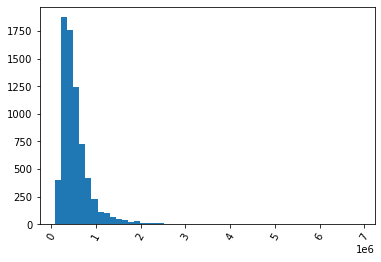

In [128]:
plt.hist(y_test, bins=50);
plt.xticks(rotation = 60);

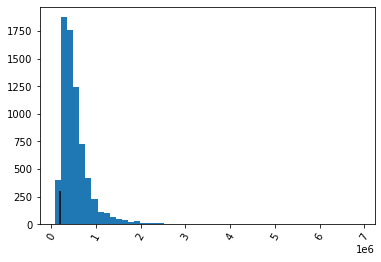

In [129]:
plt.hist(y_test, bins=50);
plt.xticks(rotation = 60);
plt.vlines(np.sqrt(test_error), 0, 300);

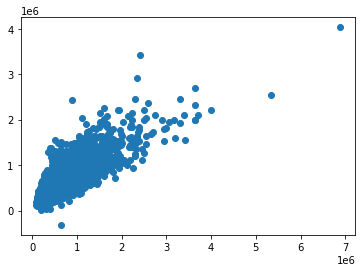

In [130]:
plt.scatter(y_test, y_pred);

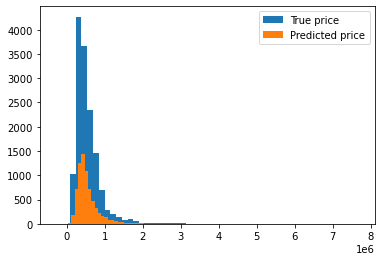

In [131]:
plt.hist(y_train, bins=50, label='True price');
plt.hist(y_pred, bins=50, label='Predicted price');
plt.legend();

In [132]:
from sklearn.linear_model import Ridge
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_val[num_features] = scaler.transform(X_val[num_features])

In [133]:

rmse_val = {}
for alpha in np.logspace(-6,1,20):
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_train)
    y_val_pred = reg.predict(X_val)
    rmse_val[alpha] = np.sqrt(mse(y_val_pred, y_val))
    
print(min(rmse_val.items(), key=lambda x: x[1]))

(1e-06, 199345.4878197522)


In [134]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

#numeric features
scaler = MinMaxScaler()
scaler.fit(X_train[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Train model with optimal hyperparameter
reg = Ridge(alpha=min(rmse_val.items(), key=lambda x: x[1])[0])
reg.fit(X_train, y_train)

# Predict on unseen data
y_pred = reg.predict(X_test)

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

TrainMSE1=round(mse(y_pred_train, y_train),3)
TestMSE1=round(mse(y_pred_test, y_test),3)

print('TrainMSE1=',round(TrainMSE1,3))
print('TestMSE1=',round(TestMSE1,3))


r2Train1=round(r2_score(y_pred_train, y_train),3)
r2Test1=round(r2_score(y_pred_test, y_test),3)

print('r2Train1=',r2Train1)
print('r2Test1=',r2Test1)

print('MSE1=',str([TrainMSE1,TestMSE1]).replace(' ', '').replace(']', '').replace('[', ''))
print('R21=',str([r2Train1,r2Test1]).replace(' ', '').replace(']', '').replace('[', ''))


largestvalues = X_train.columns.values[reg.coef_.argsort()[-5:][::-1]]
largestvalues = str(largestvalues.tolist()).replace(' ', '').replace(']', '').replace('[', '')
print(largestvalues)

<ipython-input-134-c84ea4bf8961>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_features] = scaler.transform(X_train[num_features])
C:\Users\kriku\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-134-c84ea4bf8961>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

TrainMSE1= 40746595618.32
TestMSE1= 41816515195.266
r2Train1= 0.565
r2Test1= 0.541
MSE1= 40746595618.32,41816515195.266
R21= 0.565,0.541
'grade_13','sqft_above','sqft_basement','grade_3','bathrooms'


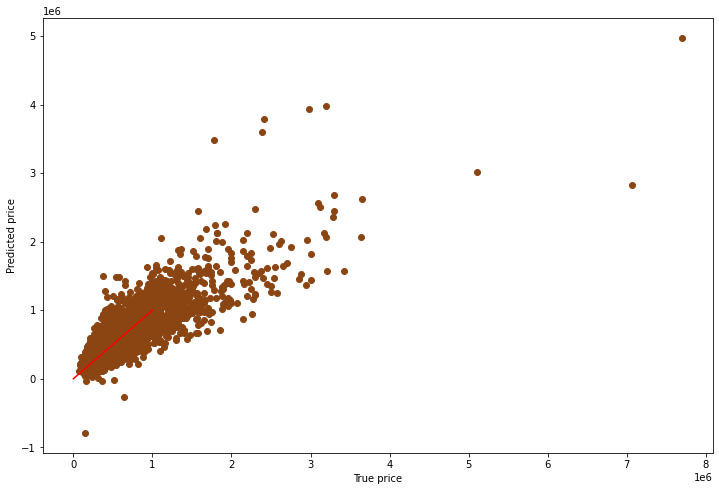

In [135]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred,c ='saddlebrown');
plt.plot([0,1_000_000], [0,1_000_000], c='r')
plt.xlabel('True price')
plt.ylabel('Predicted price');

In [136]:
R2 = r2_score(y_test, y_pred)

TrainMSE2= 35324751089.475
TestMSE2= 48028812943.767
r2Train2= 0.581
r2Test2= 0.37
Number of neighbours: 10
MSE2= 35324751089.475,48028812943.767
R22= 0.581,0.37


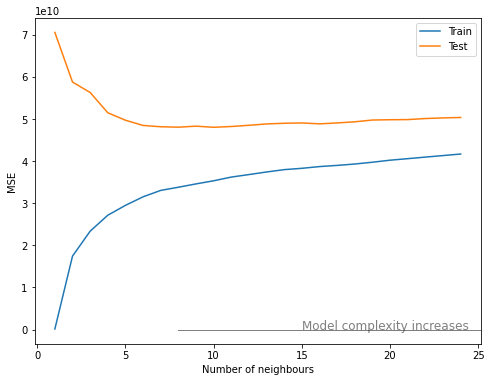

In [137]:
from sklearn.neighbors import KNeighborsRegressor

test_error = []
train_error = []
n=25
for n_neighbours in range(1, n):
        
    reg = KNeighborsRegressor(n_neighbours)
    reg.fit(X_train, y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    train_error.append(mse(y_pred_train, y_train))
    test_error.append(mse(y_pred_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(range(1, n), train_error, label='Train')
plt.plot(range(1, n), test_error, label='Test')
plt.legend();
plt.arrow(40, 10, -30, 0, head_width=2, head_length=2, alpha=.5)
plt.annotate('Model complexity increases', [15, 5], size=12, alpha=.5);
plt.xlabel('Number of neighbours')
plt.ylabel('MSE');


# Best model
n_neigh = list(range(1, n))[np.argmin(test_error)]
reg = KNeighborsRegressor(n_neighbors=n_neigh)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

TrainMSE2=round(mse(y_pred_train, y_train),3)
TestMSE2=round(mse(y_pred_test, y_test),3)

print('TrainMSE2=',round(TrainMSE2,3))
print('TestMSE2=',round(TestMSE2,3))


r2Train2=round(r2_score(y_pred_train, y_train),3)
r2Test2=round(r2_score(y_pred_test, y_test),3)

print('r2Train2=',r2Train2)
print('r2Test2=',r2Test2)

print('Number of neighbours:',n_neigh)

print('MSE2=',str([TrainMSE2,TestMSE2]).replace(' ', '').replace(']', '').replace('[', ''))
print('R22=',str([r2Train2,r2Test2]).replace(' ', '').replace(']', '').replace('[', ''))

In [138]:
# Compute train and test mean squared error for your best models (list of float).

# Q25.1 Train, test MSE using linear regression with l2 regularization
print('MSE1=',str([TrainMSE1,TestMSE1]).replace(' ', '').replace(']', '').replace('[', ''))

# Q25.2 Train, test MSE using decision tree regression

# Q25.3 Train, test MSE using k nearest neighbours regression
print('MSE2=',str([TrainMSE2,TestMSE2]).replace(' ', '').replace(']', '').replace('[', ''))


MSE1= 40746595618.32,41816515195.266
MSE2= 35324751089.475,48028812943.767


In [139]:
# Compute train and test R^2 for your best models (list of float).

# Q26.1 Train, test R^2 using linear regression with l2 regularization
print('R21=',str([r2Train1,r2Test1]).replace(' ', '').replace(']', '').replace('[', ''))

# Q26.2 Train, test R^2 using decision tree regression

# Q26.3 Train, test R^2 using k nearest neighbours regression
print('R22=',str([r2Train2,r2Test2]).replace(' ', '').replace(']', '').replace('[', ''))

R21= 0.565,0.541
R22= 0.581,0.37


In [140]:
# Q27 Which features have largest (by absolute value) weight in your linear model (top 5 features)? (list of str).
print(largestvalues) #added after deadline

'grade_13','sqft_above','sqft_basement','grade_3','bathrooms'


# Make sure your .ipynb is linearly executable 
# Kernel -> Restart & Run All -> No ERROR cells

In [141]:
# Q28 Save your .ipynb file: Name_Surname_HA1.ipynb, you will be asked to upload it into the google form.